In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np

In [2]:
def get_y(x):
    return 4 * x + 7

In [3]:
x = np.random.randint(-100, 100, 500)
y = get_y(x)
y.shape   # (500,)

(500,)

In [4]:
X = x.reshape(-1,1)

In [5]:
X.shape

(500, 1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)

In [9]:
X_train.shape

(400, 1)

In [39]:
reg_model = Sequential()
reg_model.add( Dense(1, input_dim=1))    # Input Layer
reg_model.add( Dense(128))                # Hidden Layer
reg_model.add( Dense(64))
reg_model.add( Dense(31))
reg_model.add( Dense(16))
reg_model.add( Dense(1))                 # Output Layer

In [40]:
reg_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 31)                  │           2,015 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,058 (43.20 KB)

 Trainable params: 11,058 (43.20 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
reg_model.compile(loss="mse", optimizer="adam", metrics=['mse'])

In [ ]:
hist = reg_model.fit(X_train, y_train, epochs=30, batch_size=10,
                    validation_split=.1)

In [43]:
hist.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [44]:
loss = hist.history['loss']
mse = hist.history['mse']
vloss = hist.history['val_loss']
vmse = hist.history['val_mse']

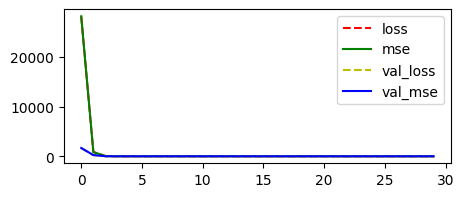

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,2))
plt.plot(loss, 'r--', label='loss')
plt.plot(mse, 'g', label='mse')
plt.plot(vloss, 'y--', label='val_loss')
plt.plot(vmse, 'b', label='val_mse')
plt.legend()
plt.show()

In [46]:
reg_model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3106e-10 - mse: 2.3106e-10  


[2.4330801262628654e-10, 2.4330801262628654e-10]

In [47]:
reg_model.predict(np.array([[-50.0]])), get_y(-50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


(array([[-192.99998]], dtype=float32), -193)

## 1차 함수로 데이터를 생성하고 노이즈 결합하기

In [53]:
# y = 2x + 5
# 1~10 사이의 데이터 1000개 생성 x = np.linspace(1,10, 1000)
# 노이즈 : noise = np.random.normal(3, 3, 1000)
# y' = 2x + 5 + noise    : 노이즈가 섞인 y 데이터
# Linear Regression, Tensorflow
# x=15일 때의 y는?

In [54]:
def get_y(x):
    return 2 * x + 5

In [55]:
x = np.linspace(1,10, 1000)
noise = np.random.normal(3, 3, 1000)
y = get_y(x) + noise

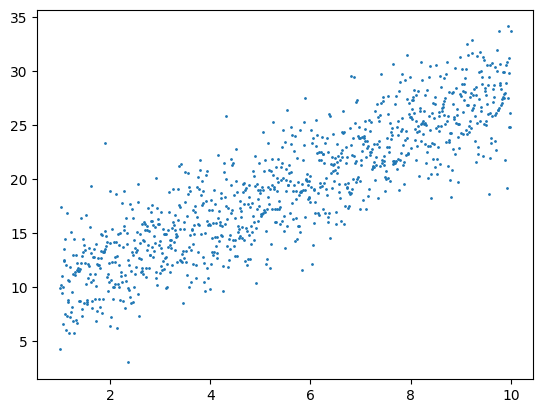

In [58]:
import matplotlib.pyplot as plt

plt.scatter(x,y,s=1)
plt.show()

In [59]:
X = x.reshape(-1,1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)

In [84]:
model = Sequential()
model.add( Dense(1, input_dim=1))
model.add( Dense(32))
model.add( Dense(16))
model.add( Dense(8))
model.add( Dense(4))
model.add( Dense(1))

In [85]:
model.compile(loss="mse", optimizer="adam", metrics=['mse'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=10,
                    validation_split=.1)

In [87]:
hist.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [88]:
loss = hist.history['loss']
mse = hist.history['mse']
val_loss = hist.history['val_loss']
val_mse = hist.history['val_mse']

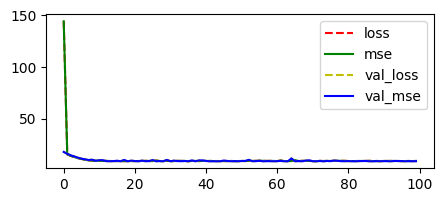

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.plot(loss, 'r--', label='loss')
plt.plot(mse, 'g', label='mse')
plt.plot(val_loss, 'y--', label='val_loss')
plt.plot(val_mse, 'b', label='val_mse')
plt.legend()
plt.show()

In [90]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9896 - mse: 9.9896    


[9.550262451171875, 9.550262451171875]

In [91]:
model.predict(np.array([[15]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[39.534306]], dtype=float32)

## 다중변수 함수의 값 회귀분석
* y = 3x1 + 5x2 + 7 + noise
* x1 : 500개
* x2 : 500개
* x1, y 산점도 표시
* x2, y 산점도 표시
* input_dim = 2
* X.shape -> (500,2)
* [[x1,x2],
   [x1,x2]
   ...
  ]

In [92]:
x1 = np.random.randint(1, 100, 500)
x2 = np.random.randint(1, 100, 500)

In [93]:
y = 3 * x1 + 5 * x2 + 7 + np.random.normal(0, 3, 500)

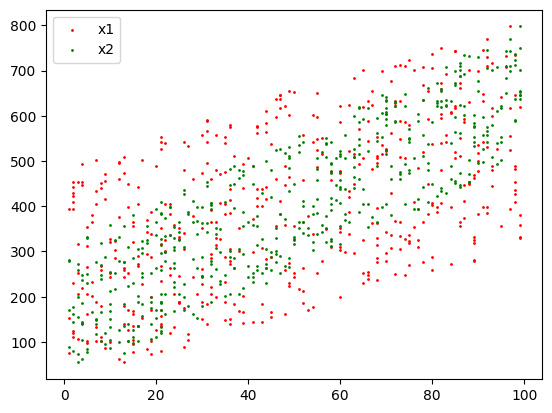

In [96]:
import matplotlib.pyplot as plt

plt.scatter(x1,y,s=1, label='x1', c='r')
plt.scatter(x2,y,s=1, label='x2', c='g')
plt.legend()
plt.show()

In [97]:
x1.shape, x2.shape, y.shape

((500,), (500,), (500,))

In [98]:
X = np.array([x1,x2]).T
X.shape

(500, 2)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)

In [100]:
model = Sequential()
model.add( Dense(2, input_dim=2))
model.add( Dense(64))
model.add( Dense(32))
model.add( Dense(16))
model.add( Dense(8))
model.add( Dense(4))
model.add( Dense(2))
model.add( Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
model.compile(loss="mse", optimizer="adam", metrics=['mse'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=500, batch_size=10,
                    validation_split=.1)

In [104]:
hist.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [105]:
loss = hist.history['loss']
mse = hist.history['mse']
val_loss = hist.history['val_loss']
val_mse = hist.history['val_mse']

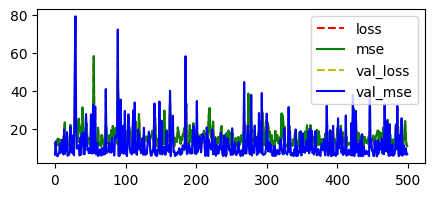

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.plot(loss, 'r--', label='loss')
plt.plot(mse, 'g', label='mse')
plt.plot(val_loss, 'y--', label='val_loss')
plt.plot(val_mse, 'b', label='val_mse')
plt.legend()
plt.show()

In [107]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4568 - mse: 9.4568  


[10.03342056274414, 10.03342056274414]

In [108]:
model.predict(np.array([[50,50]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


array([[406.38855]], dtype=float32)

In [109]:
3 * 50 + 5 * 50 + 7

407